PYTHON-13. Визуализация данных

Задача:

 Проанализировать таблицу банка и выявить почему идет отток клиентов. 

Цели:
1. Отрыть таблицу и за счет сопоставлений, предположить почему клиенты могут уходить;
2. После каждого анализа, построить график и сделать вывод, на основании полученных данных;
3. Описать заключение для банка и дать рекомендации.


9. Закрепление знаний

In [20]:
#Импортируем таблицу
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [21]:
# Удаляю столбец не несущий полезной информации 
churn_data = churn_data.drop(['RowNumber'], axis=1)

In [22]:
# Меняем тип данных

#Привожу тип данных к категориальному признаку 
churn_data['NumOfProducts'] = churn_data['NumOfProducts'].astype('category')
churn_data['HasCrCard'] = churn_data['HasCrCard'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')
churn_data['Gender'] = churn_data['Gender'].astype('category')

# Меняю тип данных, чтобы облегчить таблицу
churn_data['CreditScore'] = churn_data['CreditScore'].astype('int32')
churn_data['Age'] = churn_data['Age'].astype('int8')
churn_data['Tenure'] = churn_data['Tenure'].astype('int8')

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [23]:
# Импортируем библиотеки для работы с графиками
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

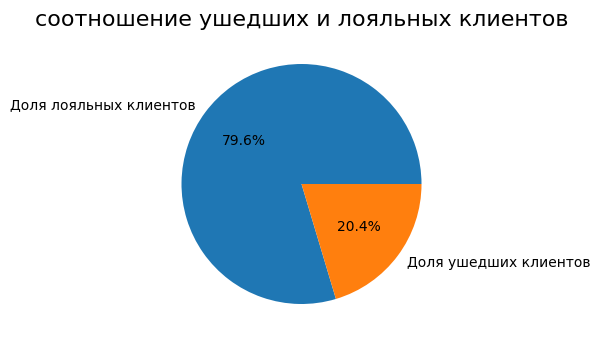

In [24]:
#Строим круговую диограмму, так как она лучше всего покажет соотношение ушедших и лояльных клиентов. 
customer_ratio = churn_data['Exited'].value_counts()

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    customer_ratio,
    labels=['Доля лояльных клиентов', 'Доля ушедших клиентов'],
    autopct='%.1f%%',
)

axes.set_title('соотношение ушедших и лояльных клиентов', fontsize=16);


На графике отчетливо видно отток клиентов, который соответствует 20% 

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0.5, 1.0, 'Гистограмма показывающая распределение баланса пользователей')

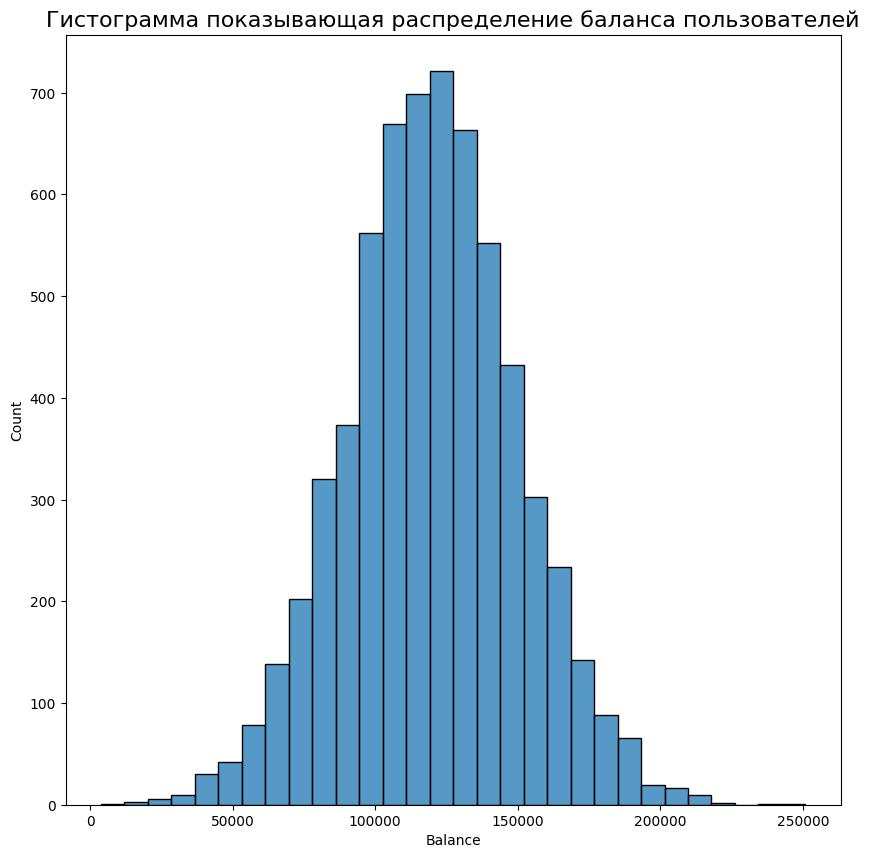

In [25]:
#В новой переменной заносим отсортированную тублицу
balance = churn_data[churn_data['Balance'] > 2500.0]

# Строим гистограмму 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.histplot(
    data=balance,
    x='Balance',
    bins=30,
);

axes.set_title('Гистограмма показывающая распределение баланса пользователей', fontsize=16)


На графике видно, большая часть клиентов имеют баланс на счетах в диапазоне  от 100 до 150 тыс.дол. Распределение похоже на нормальное

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

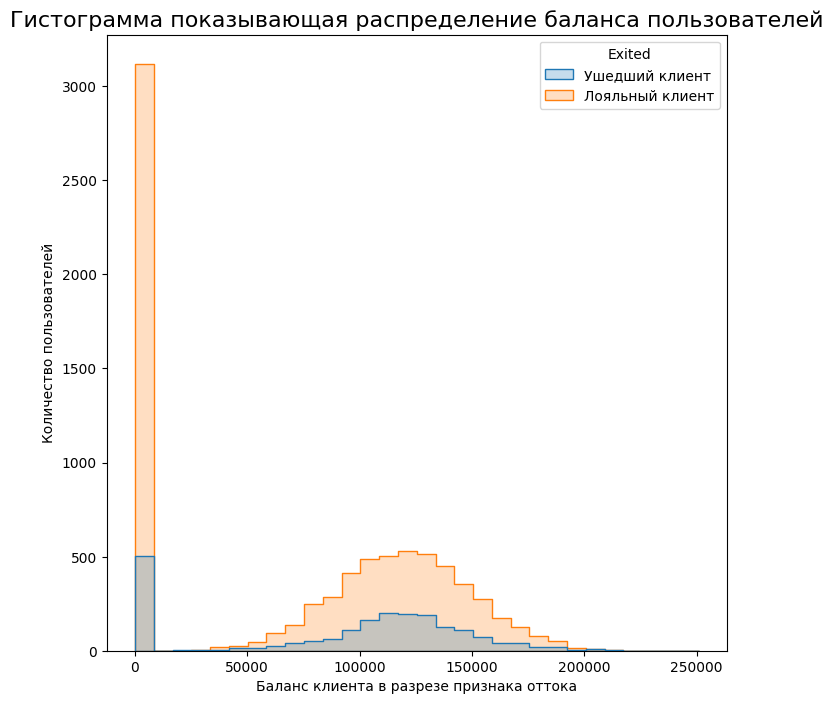

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

balan = churn_data[churn_data['Balance'] > -1]

balan['Exited'] = balan['Exited'].replace({0: 'Лояльный клиент', 1: 'Ушедший клиент'})

histplot = sns.histplot(data=balan, x='Balance', bins=30, hue='Exited', element="step")


histplot.set_title('Гистограмма показывающая распределение баланса пользователей', fontsize=16);
histplot.set_xlabel('Баланс клиента в разрезе признака оттока');
histplot.set_ylabel('Количество пользователей');
plt.show()

Согласно графику, отчётливо видно, что большая часть клиентов покинули банк имея на счетах 0 долларов. Это может быть связано по двум причинам: 
1. клиенты перевели все свои деньги в другое место и закрыли счет; 
2. клиенты изначально не пользовались банком и со временем закрыли счета. 

Есть интересный момент, на который стоит обратить внимание банку, это то, что более 3000 человек имеют нулевой баланс и в любой момент они могут стать неактивными клиентами. 


9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

C:\Users\Георгий\AppData\Local\Temp\ipykernel_12448\1186116558.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Тип пользователя')

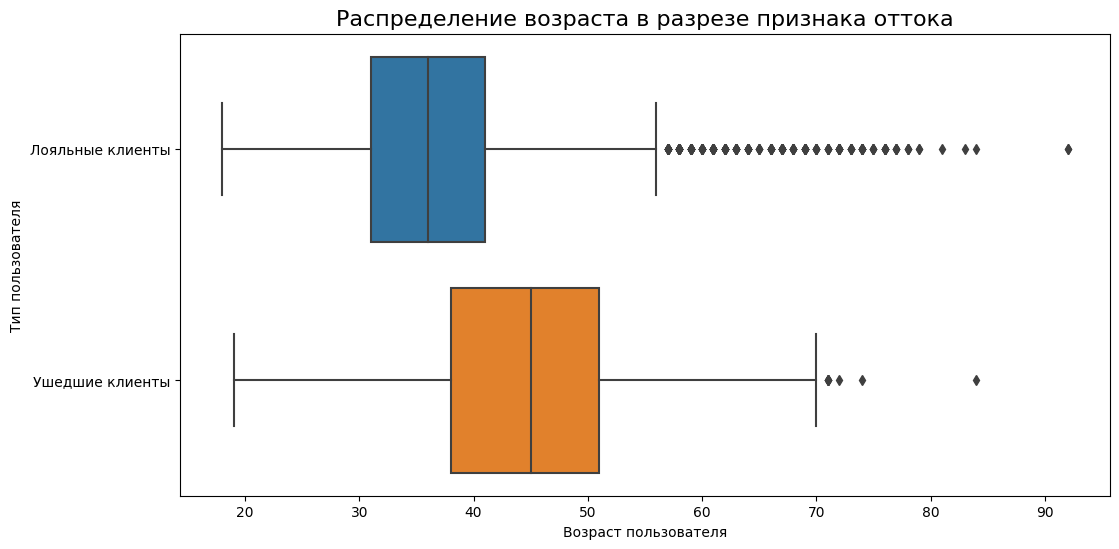

In [27]:
#Сортируем таблицу, после чего строим график 
balan = churn_data[churn_data['Balance'] > 2500.0]

balan['Exited'] = balan['Exited'].replace({0: 'Лояльные клиенты', 1: 'Ушедшие клиенты'})

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=balan, x='Age', y='Exited')
boxplot.set_title('Распределение возраста в разрезе признака оттока', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя')


Из представленного графика видно, что основной поток ушедших клиентов находиться в разрезе от 38 до 52 лет, где 50% квантиль смещен к возрасту 45-46 лет. Данная группа людей имеют статус работающего человека и можно предположить, что у банка плохо развитая система с зарплатными картами или услуги банки не соответствуют ожиданиям работающего персонала

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

C:\Users\Георгий\AppData\Local\Temp\ipykernel_12448\3493319865.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



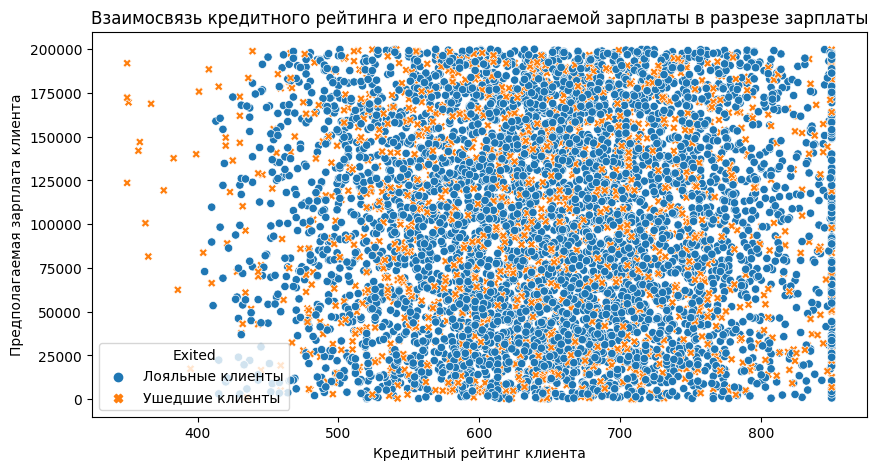

In [28]:
#Сортируем таблицу, после чего строим график 
balan['Exited'] = balan['Exited'].replace({0: 'Лояльные клиенты', 1: 'Ушедшие клиенты'})

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=balan,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    style='Exited',
);
scatterplot.set_title('Взаимосвязь кредитного рейтинга и его предполагаемой зарплаты в разрезе зарплаты', fontsize=12);
scatterplot.set_xlabel('Кредитный рейтинг клиента');
scatterplot.set_ylabel('Предполагаемая зарплата клиента');

Основанная масса ушедших клиентов на данном графике не понятно почему решила уйти. Но существует ряд клиентов, у которых низкий рейтинг банка который составляет 400, соответственно это те клиенты, которые вовремя не возвращают деньги банку. 

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

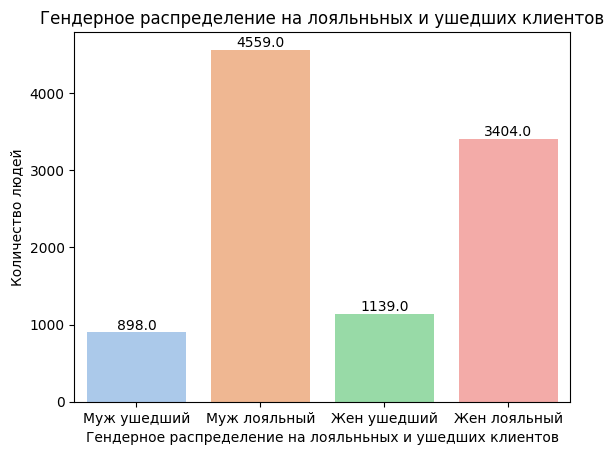

In [29]:
#Сортируем таблицу, после чего строим график 
cross_table = pd.crosstab(churn_data['Exited'], churn_data['Gender'])

# Создаем DataFrame с нужными значениями для графика
graph_data = pd.DataFrame({'Муж ушедший': cross_table.loc[1, 'Male'],
                           'Муж лояльный': cross_table.loc[0, 'Male'],
                           'Жен ушедший': cross_table.loc[1, 'Female'],
                           'Жен лояльный': cross_table.loc[0, 'Female']},
                          index=['Количество попаданий'])

# Построение графика с использованием Seaborn
ax = sns.barplot(data=graph_data, palette='pastel')

# Добавление подписей к значениям
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Гендерное распределение на лояльньных и ушедших клиентов')
plt.ylabel('Количество людей')
plt.title('Гендерное распределение на лояльньных и ушедших клиентов')
plt.show()

Согласно графику, отчетливо видно, что ушедших женщин больше, чем мужчин. Также отчетливо видно, что мужчины больше пользуются услугами банка, чем женщины

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

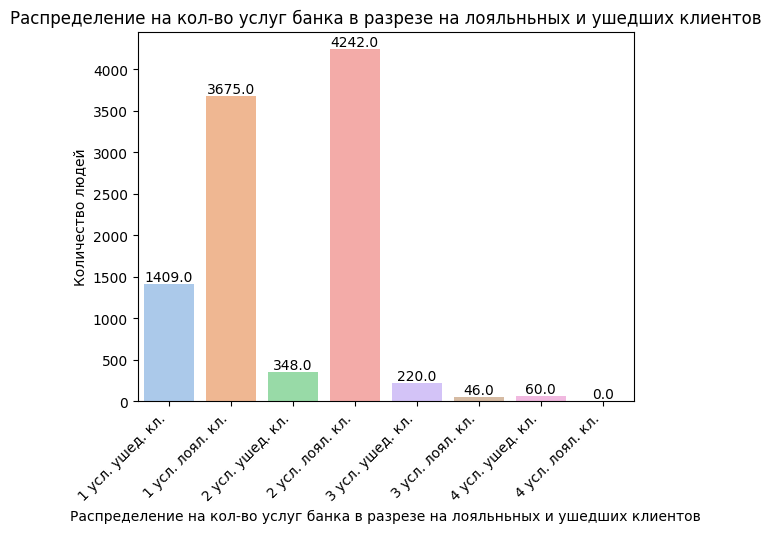

In [30]:
#Сортируем таблицу, после чего строим график 
cross_table = pd.crosstab(churn_data['Exited'], churn_data['NumOfProducts'])

# Создаем DataFrame с нужными значениями для графика
graph_data = pd.DataFrame({'1 усл. ушед. кл.': cross_table.loc[1, 1],
                           '1 усл. лоял. кл.': cross_table.loc[0, 1],
                           '2 усл. ушед. кл.': cross_table.loc[1, 2],
                           '2 усл. лоял. кл.': cross_table.loc[0, 2],
                           '3 усл. ушед. кл.': cross_table.loc[1, 3],
                           '3 усл. лоял. кл.': cross_table.loc[0, 3],
                           '4 усл. ушед. кл.': cross_table.loc[1, 4],
                           '4 усл. лоял. кл.': cross_table.loc[0, 4]},
                          index=['Количество попаданий'])

# Построение графика с использованием Seaborn
ax = sns.barplot(data=graph_data, palette='pastel')

# Добавление подписей к значениям
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Распределение на кол-во услуг банка в разрезе на лояльньных и ушедших клиентов')
plt.ylabel('Количество людей')
plt.title('Распределение на кол-во услуг банка в разрезе на лояльньных и ушедших клиентов')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Столбчатая диаграмма показывает зависимость ушедших клиентов к воспользовавшись услугами банка. Согласно статистике, все клиенты, которые пользовались 4-мя услугами банка, в итоге отказались от банка. Также большое количество клиентов отказываются от банка, которые имеют более 3-х услуг банка. Можно сделать вывод, что клиенты не справляются с взятыми на себя обязанностями. Также можно подчеркнуть, что банк плохо анализирует своих клиентов, потому что одобряет большее количество услуг.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

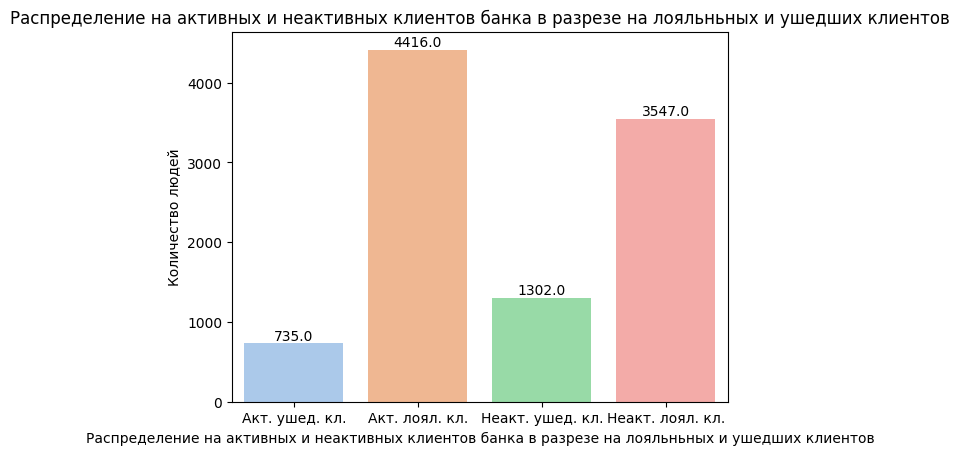

In [31]:
cross_table = pd.crosstab(churn_data['Exited'], churn_data['IsActiveMember'])

# Создаем DataFrame с нужными значениями для графика
graph_data = pd.DataFrame({'Акт. ушед. кл.': cross_table.loc[1, 1],
                           'Акт. лоял. кл.': cross_table.loc[0, 1],
                           'Неакт. ушед. кл.': cross_table.loc[1, 0],
                           'Неакт. лоял. кл.': cross_table.loc[0, 0]},
                          index=['Количество попаданий'])


# Построение графика с использованием Seaborn
ax = sns.barplot(data=graph_data, palette='pastel')

# Добавление подписей к значениям
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Распределение на активных и неактивных клиентов банка в разрезе на лояльньных и ушедших клиентов')
plt.ylabel('Количество людей')
plt.title('Распределение на активных и неактивных клиентов банка в разрезе на лояльньных и ушедших клиентов')
plt.show()

1 Как влияет наличие статуса активного клиента на отток клиентов? - данный статус не влияет на уход клиента.

2 Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных? - чтобы поднять активность клиента, его необходимо вовлекать в процесс работы с банком, например:

2.1. установить малые игры, где за достижения определенных условий, клиент получит скидку или какой-нибудь повышенный кэшбек;

2.2. обучающие игры и опросники. Создай интерфейс помогающим людям подтягивать свои знания в области финансовой грамотности;

2.3. Делиться своими результатами с клиентами, например, банк достиг чего-то благодаря Вас и (бла, бла, бла);

2.4. Договориться с администрацией города и устраивать опросы, собирать пожертвования по улучшению города. Так каждый участник может видеть свой вклад в развитие общего дела. Такие же мероприятия можно осуществлять и с помощью больных людей и животных, которые попали в сложнейшую ситуацию. Банк выступает в роли организатора и гаранта денежных средств;

2.5. Постоянно общаться с клиентами и спрашивать их мнение о работе банка.


9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [38]:
# Делаем отбор в новой таблице
grouped_data = churn_data.groupby(['Geography'])[['Exited']].mean()


#Строим график 
fig = px.choropleth(grouped_data,
                    locations=grouped_data.index,
                    locationmode='country names',
                    color='Exited',
                    title='Среднее значение оттока клиентов на карте мира',
                    labels={'Exited': 'Churn Rate'},
                    color_continuous_scale='Viridis')

fig.show()



Согласно графику, видно, что большинство ушедших клиентов, это выходцы из Германии. 

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [33]:
# Создаем функция расчета для нового столбца с кредитным рейтингом.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [34]:
#Создаем новый столбец 
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# В новом столбце меняем тип данных 
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')


In [39]:

#Создаем таблицу с данными 
filter_1 =  pd.pivot_table(churn_data,
               index=["CreditScoreCat"],
               values=["Exited"],
               columns=['Tenure'],
               aggfunc=['mean'],
               fill_value=0)

filter_1

mean                                                     
                  Exited                                                     
Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333  \
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

                                                                  
                                                                  
Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229508  0.333333

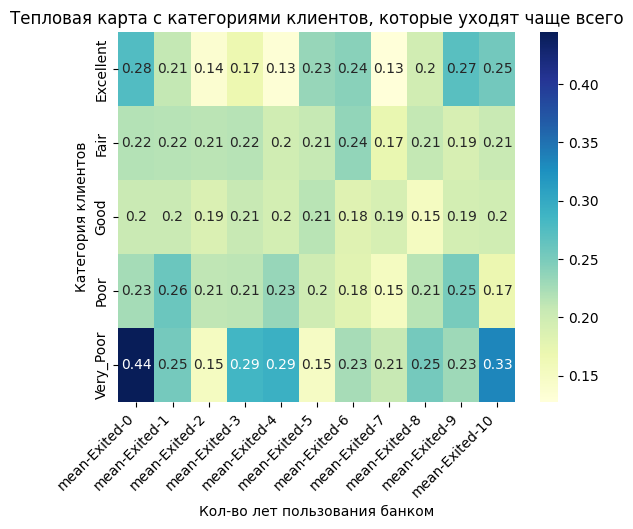

In [37]:

#На основании полученных данных создаем тепловую карту 
ax = sns.heatmap(filter_1, annot=True, cmap='YlGnBu', cbar=True)
plt.xlabel('Кол-во лет пользования банком')
plt.ylabel('Категория клиентов')
plt.title('Тепловая карта с категориями клиентов, которые уходят чаще всего')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()



На тепловой карте отчетливо видно, что уходят клиенты,
1.  у которых кредитный рейтинг является очень плохой 'very_poor' и они пользуются банком менее года.
2. Следующая категория ушедших находятся на всей линии очень плохого рейтинга с годом использования банка от 1 до 10 лет. Это говорит о том, что за время пользования банкам, клиенты зарекомендовали себя как безответственные лица, а так как клиент не исправляет свой статус, он попросту уходит из банка. 
3. Самый мало заметный признак, который не стоит отпускать из виду тех клиентов, у которых кредитный рейтинг высокий и пользуются они банком до года, 5 и 6 год и от 9 лет. Банку стоит пристально уделить внимание этим гражданам, так как это самые теплые клиенты и их уход из банка может пошатнуть сам рейтинг банка.


Резюмируя всю работу хочется отметить следующее сегменты клиентов:
1. Потенциальные клиенты, которые уходят это лица, находящиеся в возрасте от 38 до 52 лет, в основном имеют не высокий рейтинг и изначально у них на счетах о долларов. Банку необходимо уделить четкое внимание на эту категорию людей.
2. Вторая категория лиц находятся в той же возрастной категории, но при этом имеют высокий рейтинг, и имеют суммы в банке. Данная категория, очень важна для банка, так как клиенты честны перед банком и все возвращают, но по каким-то причинам они уходят. Банку надо связываться с такими клиентами и с каждом в устном порядке работать, один такой клиент может привести не только деньги в банк и но и быть распространителем рекомендаций среди своего окружения, у которых на счетах могут быть такие же средние чеки в 100 тыс. долларов.
3. Данная категория, очень туманная. И я сейчас описываю лояльных клиентов, у которых на счетах 0 и их около 3 тыс. человек. Банку необходимо проработать с этой массой людей до тех пор, пока не стали ушедшими.
